Nome do ambiente virtual:

`conda create -n dados python=3.9.2`

`conda activate dados`

# Processamento de dados com a biblioteca clisops

Link para a biblioteca:

[https://clisops.readthedocs.io/en/latest/index.html](https://clisops.readthedocs.io/en/latest/index.html)

Link para aplicações:

[https://clisops.readthedocs.io/en/latest/api.html](https://clisops.readthedocs.io/en/latest/api.html)

O pacote clisops (pronuncia-se “clie-sops”) fornece uma biblioteca python para executar operações de redução de dados em conjuntos de dados ou arquivos Xarray que podem ser interpretados pelo Xarray. Essas operações básicas (subconjunto, média e regridding) provavelmente funcionarão onde as estruturas de dados são do tipo NetCDF, como aquelas encontradas em conjuntos de dados ESGF.

O clisops pode ser usado de forma independente para ler diretamente arquivos NetCDF individuais ou grupos.

O pacote fornece as seguintes operações: 
* processamento em subconjunto de dados
* médias
* regrid (interpolação)

# Instalação de bibliotecas

Este é o método preferido para instalar clisops, pois ele sempre instalará a versão estável mais recente.

In [314]:
# 1) Instalação completa do xESMF. Digitar as linhas abaixo no terminal do Linux.
#conda install -c conda-forge dask netCDF4 
#conda install -c conda-forge matplotlib cartopy jupyterlab
#conda install -c conda-forge esmpy xarray scipy
#!pip install git+https://github.com/pangeo-data/xesmf.git

# 2) Testa a instalação do xESMF:
#pip install pytest
#pytest -v --pyargs xesmf

# 3) Instalação do clisops
#!pip install clisops

# 4) Instalação do pygeos
#!pip install pygeos==0.12.0

Algumas operações de médias (`clisops.core.average_shape`) requerem pelo menos a versão 0.5.2 do pacote [xESMF](https://xesmf.readthedocs.io/en/latest/index.html).

Outra dependência opcional é [pygeos](https://pygeos.readthedocs.io/en/latest/index.html). Se instalado, o desempenho de `core.subset.create_mask` e `core.subset.subset_shape` será bastante aprimorado.

# Processamento de dados

## Exemplo 1: Uso da função clisops.core.subset.create_mask

Neste exemplo, utiliza-se um arquivo **shapefile para mascarar o arquivo de chuva**. 

O mais interessante, por exemplo, no caso do shapefile utilizado referente ao Brasil, foram gerados 27 polígonos que representam os estados brasileiros para serem utilizados para aplicar a máscara no arquivo de chuva.

Importação de bibliotecas

In [315]:
import geopandas as gpd
import xarray as xr
from clisops.core.subset import create_mask
import matplotlib.pyplot as plt

Abertura dos arquivos

In [316]:
# Arquivo mensal de chuva desde jan/2019 a dez/2021 = 36 meses.
ds = xr.open_dataset('../dados/NetCDF/MERGE_CPTEC_2019_2021.nc', decode_times=False)

# Shapefile com os 27 estados do Brasil.
polys = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

# Período de interesse. Tem que coincidir com o dado.
data_inicial='2019-01-01'  # Formato YYYY-MM-DD.
data_final='2021-12-01'  # Formato YYYY-MM-DD.

# Adicona atributos (units, Axis, long_name e standard_name) a dimensão "time".
ds['time'] = xr.date_range(data_inicial, data_final, name='time', freq='MS')
ds.time.attrs['units'] = "hours since 1800-01-01 00:00:0.0"
ds.time.attrs['Axis'] = "T"
ds.time.attrs['long_name'] = "Time"
ds.time.attrs['standard_name'] = "time" 

In [317]:
ds

<xarray.Dataset>
Dimensions:    (time: 36, longitude: 420, latitude: 410)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01
  * longitude  (longitude) float64 -75.95 -75.85 -75.75 ... -34.25 -34.15 -34.05
  * latitude   (latitude) float64 -33.95 -33.85 -33.75 -33.65 ... 6.75 6.85 6.95
Data variables:
    prec       (time, latitude, longitude) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 2.0.5 (https://mpime...
    Conventions:          COARDS
    History:              created by wgrib2
    GRIB2_grid_template:  0
    frequency:            mon
    history:              Wed May 11 13:48:42 2022: cdo -sellonlatbox,-76,-34...
    CDO:                  Climate Data Operators version 2.0.5 (https://mpime...

In [318]:
polys

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,RONDÔNIA,NORTE,11,"POLYGON ((-62.86662 -7.97587, -62.86017 -7.982..."
1,ACRE,NORTE,12,"POLYGON ((-73.18253 -7.33550, -73.05413 -7.381..."
2,AMAZONAS,NORTE,13,"POLYGON ((-67.32609 2.02971, -67.31682 2.00125..."
3,RORAIMA,NORTE,14,"POLYGON ((-60.20051 5.26434, -60.19828 5.26045..."
4,PARÁ,NORTE,15,"MULTIPOLYGON (((-46.06095 -1.09470, -46.06666 ..."
5,AMAPÁ,NORTE,16,"MULTIPOLYGON (((-50.18123 1.90099, -50.17688 1..."
6,TOCANTINS,NORTE,17,"POLYGON ((-48.35878 -5.17008, -48.35617 -5.171..."
7,MARANHÃO,NORDESTE,21,"MULTIPOLYGON (((-43.99913 -2.39272, -43.99937 ..."
8,PIAUÍ,NORDESTE,22,"POLYGON ((-41.74605 -2.80350, -41.74241 -2.805..."
9,CEARÁ,NORDESTE,23,"POLYGON ((-40.49717 -2.78451, -40.49173 -2.788..."


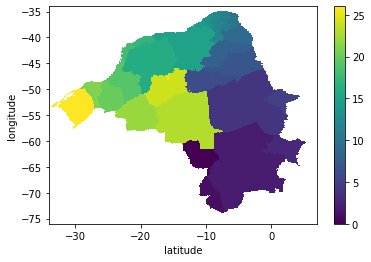

In [319]:
# Cria a máscara com todos os polígonos. Cada estado brasileiro é uma máscara individual.
mask = create_mask(x_dim=ds.longitude, y_dim=ds.latitude, poly=polys)  
mask.plot()

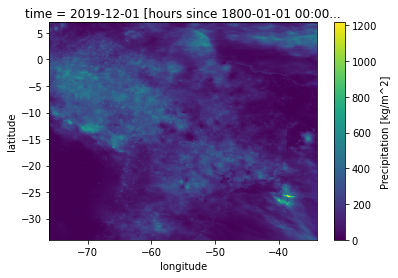

In [320]:
ds = ds.assign_coords(regions=mask)
ds.sel(time='2019-12').prec.plot()
plt.show()

As operações podem ser aplicadas a cada região com groupby. No exemplo abaixo, a **média espacial foi aplicada** gerando uma série temporal para cada estado do Brasil.

Na linha abaixo é criada uma coordenada chamada `regions` que possui 27 (0 a 26) valores, ou seja, são os 27 estados brasileiros. Esta linha de comando realiza a **média espacial** para cada um dos estados.

In [321]:
ds = ds.groupby('regions').mean()
ds

<xarray.Dataset>
Dimensions:  (regions: 27, time: 36)
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01
  * regions  (regions) float64 0.0 1.0 2.0 3.0 4.0 ... 22.0 23.0 24.0 25.0 26.0
Data variables:
    prec     (regions, time) float32 320.4 309.4 291.7 ... 123.4 71.24 43.59

A região 4 (`regions=4`) é o Estado do Pará.

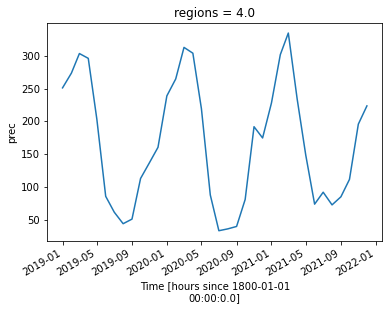

In [322]:
ds.sel(regions=4).prec.plot()
plt.show()

As linhas abaixo geram o nome dos estados brasileiros apenas para efeito de identificação. O `NM_ESTADO` faz parte do arquivo shapefile aberto.

In [323]:
region_names = xr.DataArray(polys.NM_ESTADO, dims=('regions',))
ds = ds.assign_coords(regions_names=region_names)
ds

<xarray.Dataset>
Dimensions:        (regions: 27, time: 36)
Coordinates:
  * time           (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01
  * regions        (regions) int64 0 1 2 3 4 5 6 7 8 ... 19 20 21 22 23 24 25 26
    regions_names  (regions) object 'RONDÔNIA' 'ACRE' ... 'RIO GRANDE DO SUL'
Data variables:
    prec           (regions, time) float32 320.4 309.4 291.7 ... 71.24 43.59

## Exemplo 2: Uso da função clisops.core.subset.subset_shape

Neste exemplo, utiliza-se um **arquivo shapefile para mascarar o dado**, simples assim.

Importação de bibliotecas

In [324]:
from clisops.core.subset import subset_shape

Abertura dos arquivos

In [325]:
# Arquivo mensal de chuva desde jan/2019 a dez/2021 = 36 meses.
ds = xr.open_dataset('../dados/NetCDF/MERGE_CPTEC_2019_2021.nc', decode_times=False)

# Shapefile com os 27 estados do Brasil.
polys = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

# Período de interesse. Tem que coincidir com o dado.
data_inicial='2019-01-01'  # Formato YYYY-MM-DD.
data_final='2021-12-01'  # Formato YYYY-MM-DD.

# Adicona atributos (units, Axis, long_name e standard_name) a dimensão "time".
ds['time'] = xr.date_range(data_inicial, data_final, name='time', freq='MS')
ds.time.attrs['units'] = "hours since 1800-01-01 00:00:0.0"
ds.time.attrs['Axis'] = "T"
ds.time.attrs['long_name'] = "Time"
ds.time.attrs['standard_name'] = "time" 

Aplica a máscara do Brasil no arquivo de chuva. O arquivo de chuva engloba toda a América Latina.

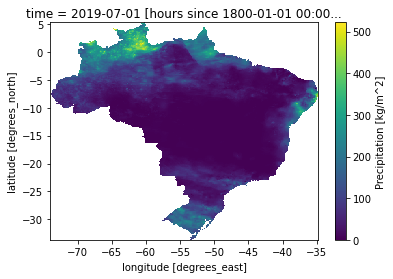

In [326]:
prSub = subset_shape(ds, shape='../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')
prSub.sel(time='2019-07').prec.plot()
plt.show()

## Exemplo 3: Uso da função clisops.core.subset.subset_time_by_components

Neste exemplo, **selecionam-se os meses** de interesse do arquivo de entrada.

Importação de bibliotecas

In [327]:
from clisops.core.subset import subset_time_by_components

Abertura dos arquivos

In [328]:
# Arquivo mensal de chuva desde jan/2019 a dez/2021 = 36 meses.
ds = xr.open_dataset('../dados/NetCDF/MERGE_CPTEC_2019_2021.nc', decode_times=False)

# Período de interesse. Tem que coincidir com o dado.
data_inicial='2019-01-01'  # Formato YYYY-MM-DD.
data_final='2021-12-01'  # Formato YYYY-MM-DD.

# Adicona atributos (units, Axis, long_name e standard_name) a dimensão "time".
ds['time'] = xr.date_range(data_inicial, data_final, name='time', freq='MS')
ds.time.attrs['units'] = "hours since 1800-01-01 00:00:0.0"
ds.time.attrs['Axis'] = "T"
ds.time.attrs['long_name'] = "Time"
ds.time.attrs['standard_name'] = "time"

In [329]:
verao = {"month": [12, 1, 2]}
res = subset_time_by_components(ds, time_components=verao)
res.time

<xarray.DataArray 'time' (time: 9)>
array(['2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2021-12-01
Attributes:
    units:          hours since 1800-01-01 00:00:0.0
    Axis:           T
    long_name:      Time
    standard_name:  time

## Exemplo 4: Uso da função clisops.core.average.average_over_dims

Neste exemplo, realiza-se a **média ao longo da dimensão especificada**.

Importação de bibliotecas

In [330]:
from clisops.core.average import average_over_dims

Abertura dos arquivos

In [331]:
# Arquivo mensal de chuva desde jan/2019 a dez/2021 = 36 meses.
ds = xr.open_dataset('../dados/NetCDF/MERGE_CPTEC_2019_2021.nc', decode_times=False)

# Período de interesse. Tem que coincidir com o dado.
data_inicial='2019-01-01'  # Formato YYYY-MM-DD.
data_final='2021-12-01'  # Formato YYYY-MM-DD.

# Adicona atributos (units, Axis, long_name e standard_name) a dimensão "time".
ds['time'] = xr.date_range(data_inicial, data_final, name='time', freq='MS')
ds.time.attrs['units'] = "hours since 1800-01-01 00:00:0.0"
ds.time.attrs['Axis'] = "T"
ds.time.attrs['long_name'] = "Time"
ds.time.attrs['standard_name'] = "time"

No exemplo abaixo, realiza-se a média de todos os pontos de latitude e longitude para cada tempo gerando uma série temporal.

A seleção das dimensões de interesse fica a critério do usuário.

In [332]:
prAvg = average_over_dims(ds, dims=['latitude', 'longitude'], ignore_undetected_dims=True)

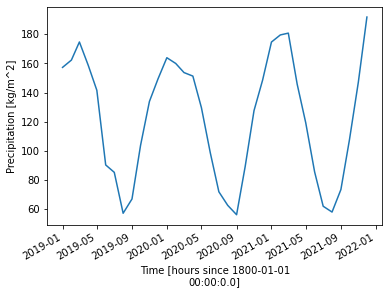

In [333]:
prAvg.prec.plot()
plt.show()

Média Zonal

Calcula a média de todas as longitudes.

In [336]:
prZon = average_over_dims(ds, dims=['longitude'], ignore_undetected_dims=True)

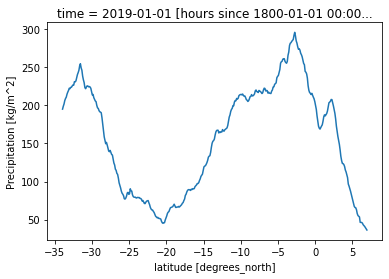

In [339]:
prZon.prec[0,:].plot()
plt.show()